Version 1 (Individual Test Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv('DataAnalysisRepeatability.csv')

# Display the first 5 rows
data.head(5)

,Test Number,TEST,X_Point1,Y_Point1,Z_Point1,X_Point2,Y_Point2,Z_Point2
0,Test1,Piston Redo,-20.062,-3.980,52.194,-20.046,-3.984,112.181
1,Test2,Piston Redo,-20.050,-3.993,52.197,-20.032,-3.997,112.183
2,Test3,Piston Redo,-20.062,-3.984,52.191,-20.043,-3.986,112.179
3,Test4,Piston Redo,-20.055,-3.988,52.188,-20.036,-3.988,112.176
4,Test5,Piston Redo,-20.054,-3.986,52.193,-20.034,-3.987,112.181


In [2]:
# TEST data type is object
print(data.dtypes)

Test Number     object
TEST            object
X_Point1       float64
Y_Point1       float64
Z_Point1       float64
X_Point2       float64
Y_Point2       float64
Z_Point2       float64
dtype: object


In [3]:
# Convert the column that contains 'TEST' in its name to categorical
data["TEST"] = pd.Categorical(data["TEST"])

# TEST data type is category
print(data.dtypes)

Test Number      object
TEST           category
X_Point1        float64
Y_Point1        float64
Z_Point1        float64
X_Point2        float64
Y_Point2        float64
Z_Point2        float64
dtype: object


In [4]:
# Looking into different types of Catagory
Category = data['TEST'].cat.categories
print(Category)

Index(['Piston Redo', 'Piston_Rail', 'Rail'], dtype='object')


In [5]:
Categoty1 = Category[0]
Categoty2 = Category[1]
Categoty3 = Category[2]

In [6]:
Category = Categoty3
data_category = data[data["TEST"] == Category]
print(Category)
data_category.head(5)

Rail


,Test Number,TEST,X_Point1,Y_Point1,Z_Point1,X_Point2,Y_Point2,Z_Point2
20,Test1,Rail,-20.379,-3.838,51.828,-20.364,-3.832,111.814
21,Test2,Rail,-20.385,-3.816,51.814,-20.375,-3.810,111.802
22,Test3,Rail,-20.388,-3.835,51.829,-20.377,-3.828,111.816
23,Test4,Rail,-20.370,-3.858,51.872,-20.346,-3.848,111.860
24,Test5,Rail,-20.335,-3.869,51.868,-20.312,-3.859,111.853


In [7]:
# Identify categorical columns
categorical_columns = data_category.select_dtypes(include=['object', 'category']).columns

# Drop categorical columns
no_categorical = data_category.drop(columns=categorical_columns)

#Standardize data for comperasion
data_Standardize = no_categorical - no_categorical.median(axis=0)
data_Standardize.head(5)

,X_Point1,Y_Point1,Z_Point1,X_Point2,Y_Point2,Z_Point2
20,-0.015,0.0295,-0.0515,-0.0355,0.026,-0.054
21,-0.021,0.0515,-0.0655,-0.0465,0.048,-0.066
22,-0.024,0.0325,-0.0505,-0.0485,0.030,-0.052
23,-0.006,0.0095,-0.0075,-0.0175,0.010,-0.008
24,0.029,-0.0015,-0.0115,0.0165,-0.001,-0.015


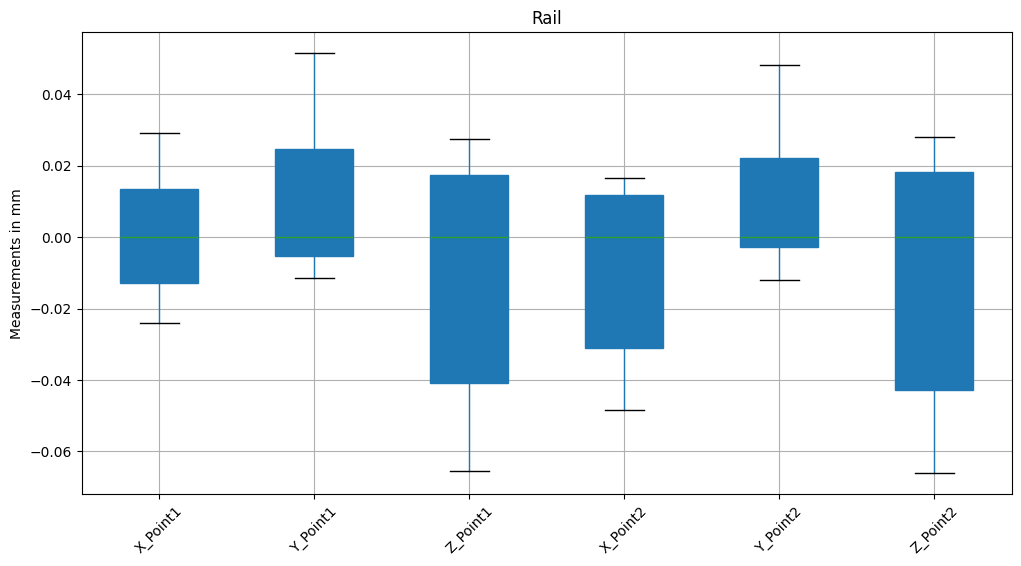

In [8]:
plt.figure(figsize=(12, 6))
data_Standardize.boxplot(patch_artist=True)
plt.title(Category)
plt.ylabel("Measurements in mm")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

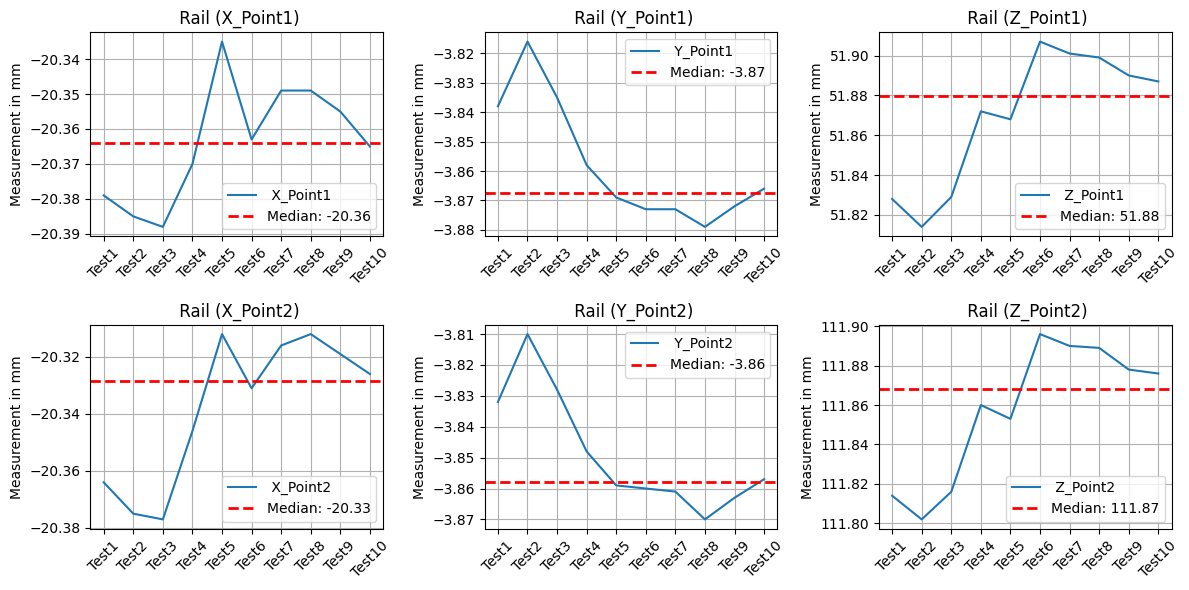

In [9]:
# Create a figure with 6 subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Loop to generate six different graphs
for i, ax in enumerate(axes.flat, start=2):    
    ax.plot(data_category['Test Number'], data_category[data_category.columns[i]], label = f' {data_category.columns[i]}')

    # Calculate the mean of the current column
    median_value = data_category[data_category.columns[i]].median()

    # Add a horizontal mean line
    ax.axhline(y=median_value, color='r', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')


    ax.set_title(f' {Category} ({data_category.columns[i]})')
    ax.set_ylabel('Measurement in mm')
    ax.tick_params(axis='x', labelrotation=45)
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Version 2 

(All TEST Analysis)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv('DataAnalysisRepeatability.csv')
data.head(5)

,Test Number,TEST,X_Point1,Y_Point1,Z_Point1,X_Point2,Y_Point2,Z_Point2
0,Test1,Piston Redo,-20.062,-3.980,52.194,-20.046,-3.984,112.181
1,Test2,Piston Redo,-20.050,-3.993,52.197,-20.032,-3.997,112.183
2,Test3,Piston Redo,-20.062,-3.984,52.191,-20.043,-3.986,112.179
3,Test4,Piston Redo,-20.055,-3.988,52.188,-20.036,-3.988,112.176
4,Test5,Piston Redo,-20.054,-3.986,52.193,-20.034,-3.987,112.181


In [11]:
data.columns

Index(['Test Number', 'TEST', 'X_Point1', 'Y_Point1', 'Z_Point1', 'X_Point2',
       'Y_Point2', 'Z_Point2'],
      dtype='object')

In [12]:
# Convert the column that contains 'TEST' in its name to categorical
data["TEST"] = pd.Categorical(data["TEST"])

# Looking into different types of Catagory
Category = data['TEST'].cat.categories
Category

Index(['Piston Redo', 'Piston_Rail', 'Rail'], dtype='object')

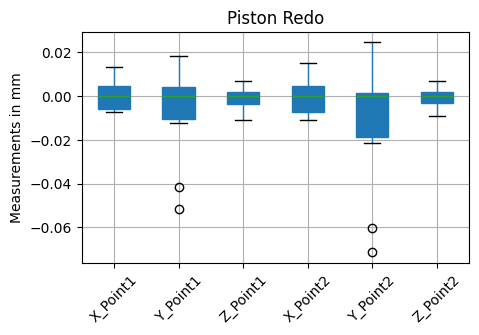

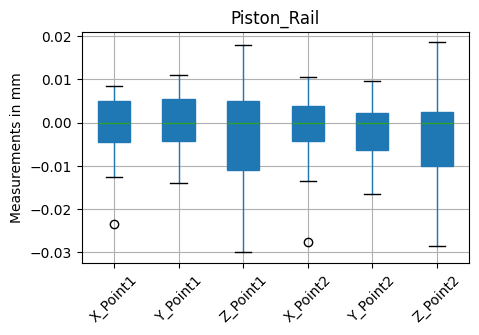

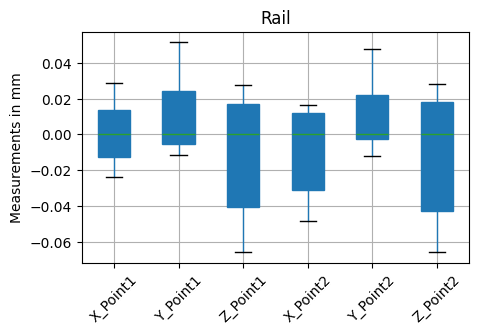

In [15]:
dict = {}

for i, different_tests in enumerate(Category):
    Key = Category[i]
    dict[Key] = data[data["TEST"] == Category[i]]

for Keys, Values in dict.items():
    # Identify categorical columns
    categorical_columns = Values.select_dtypes(include=['object', 'category']).columns

    # Drop categorical columns
    no_categorical = Values.drop(columns=categorical_columns)

    #Standardize data for comperasion
    data_Standardize = no_categorical - no_categorical.median(axis=0)

    # Box Plot
    plt.figure(figsize=(5, 3))
    data_Standardize.boxplot(patch_artist=True)
    plt.title(Keys)
    plt.ylabel("Measurements in mm")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

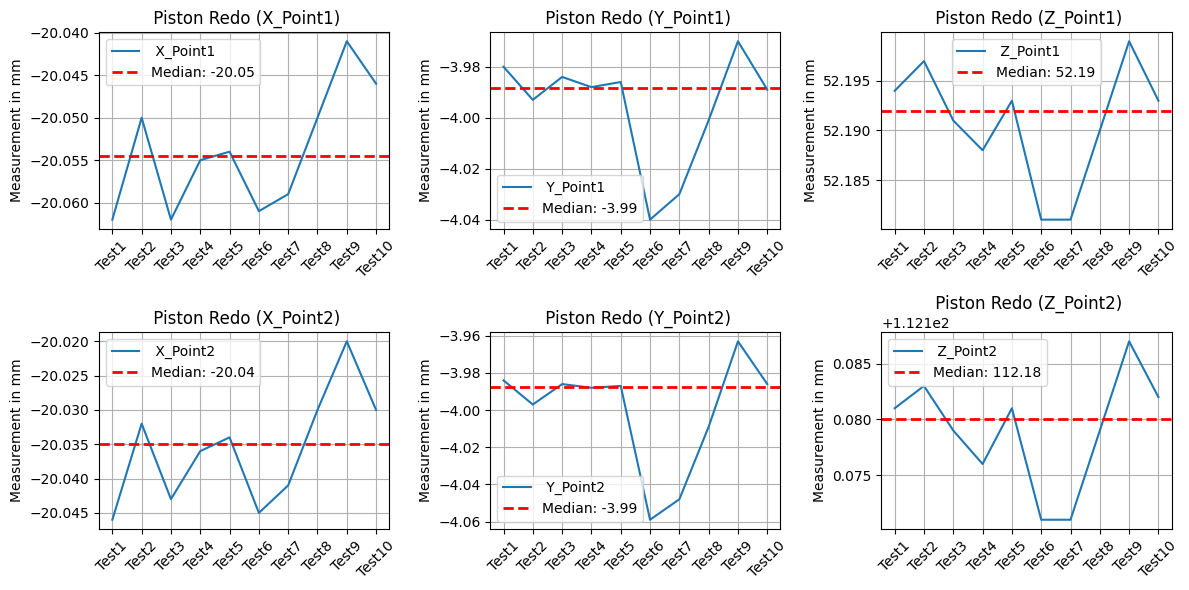

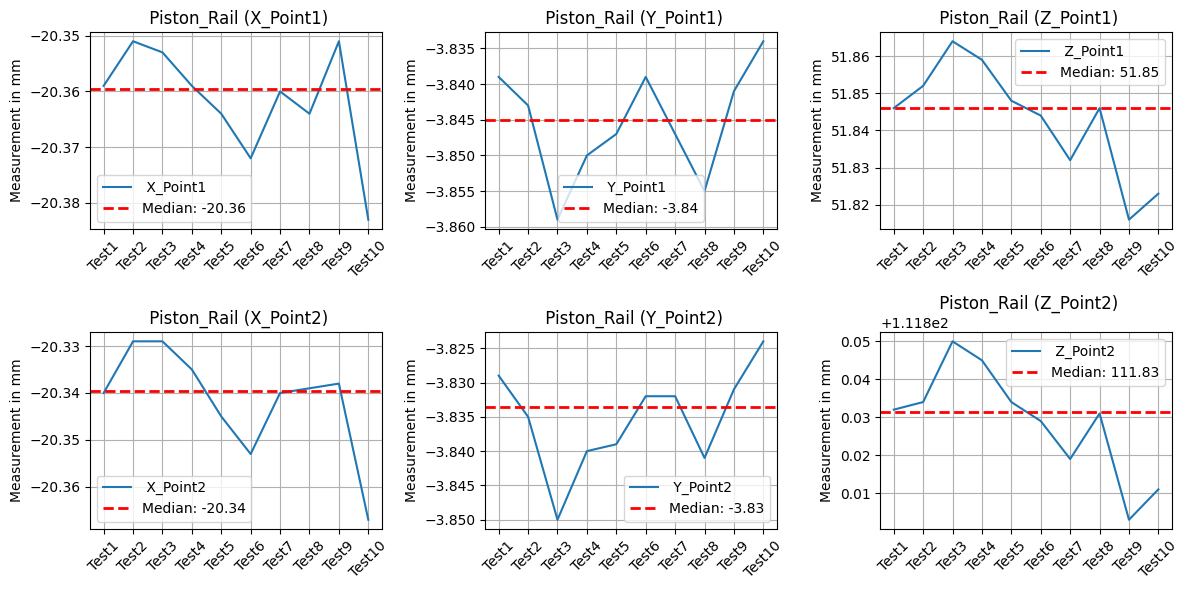

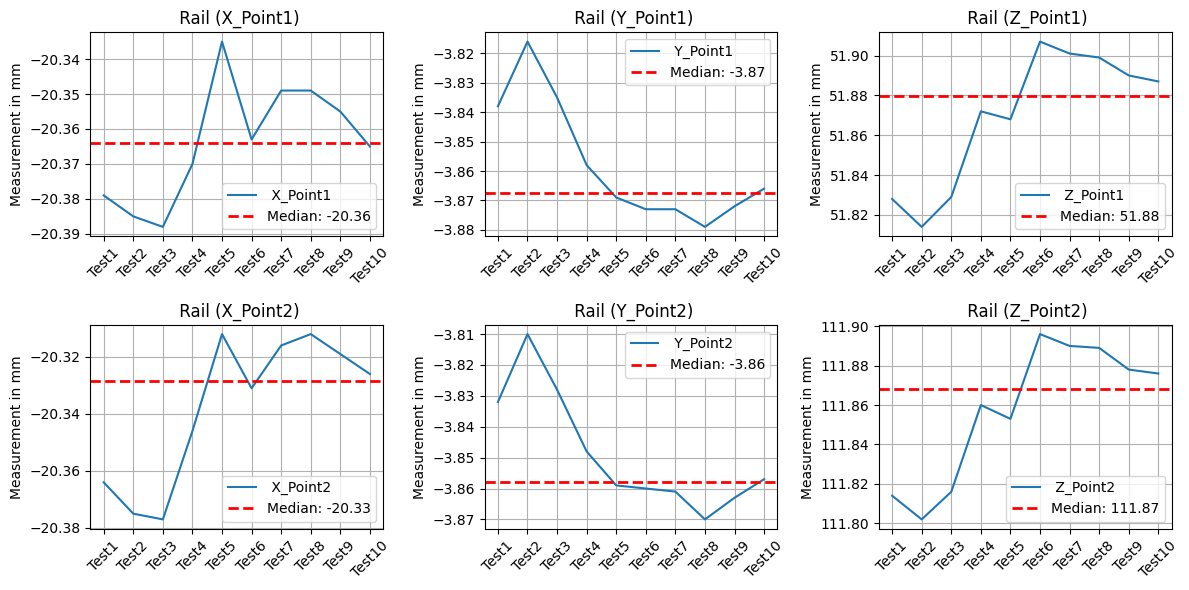

In [14]:
# Line Plot
for Keys, Values in dict.items():
    # Create a figure with 6 subplots (2 rows, 3 columns)
    fig, axes = plt.subplots(2, 3, figsize=(12, 6))

    # Loop to generate six different graphs
    for i, ax in enumerate(axes.flat, start=2):    
        ax.plot(dict[Keys]["Test Number"], dict[Keys][dict[Keys].columns[i]], label = f' {dict[Keys].columns[i]}')
        
        # Calculate the mean of the current column
        median_value = dict[Keys][dict[Keys].columns[i]].median()

        # Add a horizontal mean line
        ax.axhline(y=median_value, color='r', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

        ax.set_title(f' {Keys} ({dict[Keys].columns[i]})')
        ax.set_ylabel('Measurement in mm')
        ax.tick_params(axis='x', labelrotation=45)
        ax.legend()
        ax.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

END